## Wczytanie potrzebnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import os, re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

Automatyczne wyszukiwanie dysku przenośnego potrzbenego do ścieżki do pliku z danymi

In [2]:
discks_names =  re.findall(r"[A-Z]+:.*$",os.popen("mountvol /").read(),re.MULTILINE)

a = []
for i in range(len(discks_names)):
    b = discks_names[i].split(":")[0]
    a.append(b)

dics = a['C' in a]

dics

'D'

## Wczytanie oraz prezentacja zbioru danych

In [3]:
pd.options.display.max_columns = None
loc = dics + ":/data_football/seriaa/"
file = "seriaa_final_log"
dataset = pd.read_csv(loc + file+ '.csv', index_col = 0)
dataset.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HomeTeamLP,AwayTeamLP,Sezon,HT_LP,AT_LP,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,H2H_Home,H2H_Away,H2H_Home_pts,H2H_Away_pts,temp,Off_H,Off_A,Deff_H,Deff_A,Mean_home_goals,Mean_away_goals
3765,2019-05-05,Sassuolo,Frosinone,NaN,NaN,NaN,47.0,26.0,52.0,58.0,41,23,W,D,D,D,W,L,L,L,W,W,35,11.0,16.0,19,10,19,WDDDW,LLLWW,9.0,6.0,0,0,0,0,0,0,0,0,-5.0,-32.0,18,3.0,-5.0,DWW,DLL,7,1,377,1.200000,1.000000,1.000000,1.000000,1.800000,1.170000
3766,2019-05-05,Chievo,Spal,NaN,NaN,NaN,23.0,34.0,66.0,48.0,18,39,D,W,L,L,L,D,W,W,L,W,35,13.0,17.0,19,20,13,DWLLL,DWWLW,4.0,10.0,0,0,1,0,0,0,0,0,-43.0,-14.0,-21,-6.0,-4.0,WDD,LDD,5,2,377,0.400000,1.000000,1.000000,1.000000,0.600000,1.170000
3767,2019-05-05,Genoa,Roma,NaN,NaN,NaN,34.0,60.0,52.0,46.0,35,58,D,L,L,D,L,W,D,W,W,D,35,12.0,3.0,19,16,5,DLLDL,WDWWD,2.0,11.0,0,0,0,0,0,0,0,0,-18.0,14.0,-23,-9.0,9.0,DLL,DWW,1,7,377,0.333333,1.000000,2.232143,1.000000,0.500000,2.611607
3768,2019-05-05,Napoli,Cagliari,NaN,NaN,NaN,62.0,32.0,29.0,45.0,70,40,W,L,W,D,L,L,W,D,W,L,35,2.0,16.0,19,2,12,WLWDL,LWDWL,7.0,7.0,0,0,0,0,0,0,0,0,33.0,-13.0,30,0.0,-14.0,WWW,LLL,9,0,377,1.166667,1.041667,1.607143,1.449275,2.536232,1.958705
3769,2019-05-06,Milan,Bologna,NaN,NaN,NaN,45.0,37.0,30.0,47.0,56,37,L,D,W,L,D,W,W,D,W,L,35,6.0,15.0,19,7,14,LDWLD,WWDWL,5.0,10.0,0,0,0,0,0,0,0,0,15.0,-10.0,19,-5.0,-9.0,WWD,LLD,7,1,377,1.066667,1.000000,1.000000,1.000000,1.600000,1.170000


Wiekszość zmiennych wykorzystanych w zbiorze danych opisanych zostało w:

https://analizadanychwpilce.com/2018/09/15/przewidywanie-wyniku-spotkania-z-wykorzystaniem-regresji-logistycznej/
oraz

https://analizadanychwpilce.com/2019/02/03/przewidywany-wynik-na-podstawie-rozkladu-poissona/

Na etapie przygotowywania zbioru danych powstało kilka wierszy, które przyjmowały kategorię pomocniczą 'M'. 
W tym momencie powinniśmy pozbyć się tych obserwaci ze zbioru zbioru danych.

In [4]:
dataset = dataset.loc[(dataset["HM1"] != "M") &  (dataset["AM1"] != "M")  & (dataset["AM2"] != "M")  &
                      (dataset["HM2"] != "M")  & (dataset["HM3"] != "M") & (dataset["AM3"] != "M")  &
                       (dataset["HM4"] != "M")  & (dataset["HM4"] != "M") ]
dataset.HM1.unique()
dataset.AM1.unique()

array(['D', 'L', 'W'], dtype=object)

Każda z wymienionych powyżej zmiennych powinna posiadać tylko 3 kategorie: A, D, H.

## Dodanie dodatkowych zmiennych

Jako, że z wcześniejszych analiz doszliśmy do wniosku, że zmienna dotyczaca wartości drużyny bardzo często jest zmienną istotną w modelu predykji wyniku spotkania piłkarskiego. Dane te zostaną złączone z bazowym zbiorem danych.
Wartości zostały pobrane ze strony: https://www.transfermarkt.com/

### Dane dotyczące wartości drużyny

In [5]:
pd.options.display.max_columns = None
marketv = pd.read_csv(loc + 'budget_seriaa_final.csv', index_col = 0)

marketv.Sezon = marketv.Sezon.astype(str).str[2:]
marketv["Sezon"] = marketv["Sezon"].astype(int) + 1

dataset = pd.merge(dataset, marketv,  how='inner', left_on=['HomeTeam','Sezon'], 
                       right_on = ['Club','Sezon'], sort=False)

dataset = dataset.rename(columns={'Age': 'Age_H', 'Foreign': 'Foreign_H',
                             'Total_value': 'Total_value_H', 'Market_value': 'Market_value_H'})

dataset = pd.merge(dataset, marketv,  how='inner', left_on=['AwayTeam','Sezon'], 
                       right_on = ['Club','Sezon'], sort=False)

dataset = dataset.rename(columns={'Age': 'Age_A', 'Foreign': 'Foreign_A',
                                'Total_value': 'Total_value_A', 'Market_value': 'Market_value_A'})

dataset.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HomeTeamLP,AwayTeamLP,Sezon,HT_LP,AT_LP,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,H2H_Home,H2H_Away,H2H_Home_pts,H2H_Away_pts,temp,Off_H,Off_A,Deff_H,Deff_A,Mean_home_goals,Mean_away_goals,Club_x,Age_H,Total_value_H,Club_y,Age_A,Total_value_A
4045,2019-04-20,Juventus,Fiorentina,2.0,1.0,H,64.0,41.0,21.0,40.0,84,40,L,W,W,W,L,D,L,D,D,L,33,1.0,8.0,19,1,10,LWWWL,DLDDL,9.0,3.0,0,0,0,0,0,0,0,0,43.0,1.0,44,6.0,-7.0,WWW,LLL,9,0,375,1.689189,1.000000,2.040816,1.000000,2.500000,2.367347,Juventus,28.2,768.50,Fiorentina,24.1,221.8
4046,2019-04-03,Roma,Fiorentina,2.0,2.0,D,54.0,40.0,45.0,37.0,47,38,L,L,W,L,W,D,L,D,L,D,30,3.0,8.0,19,7,10,LLWLW,DLDLD,6.0,3.0,0,0,0,0,0,0,0,0,9.0,3.0,9,3.0,-5.0,WLD,LWD,4,4,372,1.195973,1.176471,1.000000,1.184211,2.131579,1.580511,Roma,26.7,368.80,Fiorentina,24.1,221.8
4047,2019-02-17,Spal,Fiorentina,1.0,4.0,A,20.0,31.0,36.0,25.0,22,32,L,D,W,D,L,D,D,W,D,D,24,17.0,8.0,19,14,10,LDWDL,DDWDD,5.0,7.0,0,0,0,0,0,0,0,0,-16.0,6.0,-10,-2.0,9.0,DDL,DDW,2,5,366,0.454545,1.684211,1.000000,1.125000,0.675000,2.054737,Spal,26.9,57.05,Fiorentina,24.1,221.8
4048,2019-05-05,Empoli,Fiorentina,NaN,NaN,NaN,41.0,41.0,66.0,41.0,29,40,L,L,D,L,W,L,L,D,L,D,35,16.0,8.0,19,18,11,LLDLW,LLDLD,4.0,2.0,0,0,0,0,0,0,0,0,-25.0,0.0,-11,2.0,8.0,LWL,WLW,3,6,377,1.500000,1.000000,1.000000,1.000000,2.250000,1.170000,Empoli,26.5,37.90,Fiorentina,24.1,221.8
4049,2018-12-09,Sassuolo,Fiorentina,3.0,3.0,D,23.0,15.0,22.0,15.0,20,18,D,L,D,W,D,L,D,D,D,D,15,11.0,8.0,19,8,12,DLDWD,LDDDD,6.0,4.0,0,0,0,0,0,0,0,0,1.0,0.0,2,2.0,3.0,DLW,DWL,4,4,357,0.918182,1.000000,1.000000,1.000000,1.400000,1.247525,Sassuolo,25.2,120.43,Fiorentina,24.1,221.8


Dodatkowe zmienne to Age_H ora Age_A, czyli średni wiek zawodników w drużynie odpowiednio gospdoarzy i gości.
Foreign_H oraz Foreign_A to ilośc zawodników zagrancizncyh w drużynie odpowiednio gospdoarzy i gości.
Total_value_H oraz Total_value_A czyli wartość pierwszego zespołu odpowiednio goposdarzy i gości.
Market_value_H oraz Market_value_A czyli wartość rynkowa drużyny odpowiednio goposdarzy i gości.

Stworzenie zmiennej wynikowej 'draw'

In [6]:
df_final = dataset
warnings.simplefilter('ignore')
df_final['draw'] = np.where(df_final['FTR']=='D', 1, 0)
df_final['draw']=(df_final['draw']==1).astype(int)

Zmienna 'draw' przyjmuje wartość 1 w przypadku remisu, 0 w przeciwym wypadku.
Przekonwertowana została również do typu integer. 

## Modyfikacja wbranych kolumn

### Konwersja wybranych kolumn do typu kategorycznego

Wybrane zmienne zostaną przekonwertowane do zmiennych typu kategorycznego.
Wystarczy konwersja za pomoca .astype(), gdyż wszystkie wybrane zmienne przyjmują wyłącznie dwie kategorie (1/0).

In [7]:
warnings.simplefilter('ignore')
cols_cat = [ 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'draw']
df_final[cols_cat] = df_final[cols_cat].astype('category')

Zmienne przyjmujące więcej niż dwie kategorie zostaną sprowadzone do zmiennych pomocniczych (dummy veriables) przyjmujących tylko dwie kategorie.
Przykładowo zmienna 'HM1' przyjmująca kategorie: A, H oraz D, zostanie "rozbita" na 3 zmienne: HM1_A, HM1_H, HM1_D.Każda z nich przyjmuje wyłącznie dwie kategorie 0/1.

In [8]:
cat_vars=["HM1", "HM2", "AM1", "AM2",
          "HM3", "HM4", "HM5", "AM3", "AM4", "AM5"]

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_final[var], prefix=var)
    df_final1=df_final.join(cat_list)
    df_final=df_final1

data_vars=df_final.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

df_final=df_final[to_keep]
df_final.columns.values

array(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS',
       'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'MW', 'HomeTeamLP',
       'AwayTeamLP', 'Sezon', 'HT_LP', 'AT_LP', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts', 'DiffLP', 'H2H_Home', 'H2H_Away',
       'H2H_Home_pts', 'H2H_Away_pts', 'temp', 'Off_H', 'Off_A', 'Deff_H',
       'Deff_A', 'Mean_home_goals', 'Mean_away_goals', 'Club_x', 'Age_H',
       'Total_value_H', 'Club_y', 'Age_A', 'Total_value_A', 'draw',
       'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'AM1_D',
       'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'HM3_D', 'HM3_L',
       'HM3_W', 'HM4_D', 'HM4_L', 'HM4_W', 'HM5_D', 'HM5_L', 'HM5_M',
       'HM5_W', 'AM3_D', 'AM3_L', 'AM3_W', 'AM4_D', 'AM4_L', 'AM4_W',
       'AM5_D', 'AM5_L', '

### Wstępne wyrzucenie zbędnych zmiennych

In [9]:
cols_sel = ['HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'MW', 'HomeTeamLP',
       'AwayTeamLP',  'HT_LP', 'AT_LP', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts', 'DiffLP', 'H2H_Home', 'H2H_Away','Total_value_H', 'Total_value_A',
       'H2H_Home_pts', 'H2H_Away_pts',  'Mean_home_goals', 'Mean_away_goals', 'Age_H', 'Age_A',
         'draw', 'HM1_D',   'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'AM1_D', 'AM1_L',
       'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'HM3_D', 'HM3_L', 'HM3_W',
       'HM4_D', 'HM4_L', 'HM4_W', 'HM5_D', 'HM5_L', 'HM5_M', 'HM5_W',
       'AM3_D', 'AM3_L', 'AM3_W', 'AM4_D', 'AM4_L', 'AM4_W', 'AM5_D',
       'AM5_L', 'AM5_M', 'AM5_W']

df_final = df_final[cols_sel]

### Przegląd danych

In [10]:
df_final.describe()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,MW,HomeTeamLP,AwayTeamLP,HT_LP,AT_LP,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,Total_value_H,Total_value_A,H2H_Home_pts,H2H_Away_pts,Mean_home_goals,Mean_away_goals,Age_H,Age_A,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,HM3_D,HM3_L,HM3_W,HM4_D,HM4_L,HM4_W,HM5_D,HM5_L,HM5_M,HM5_W,AM3_D,AM3_L,AM3_W,AM4_D,AM4_L,AM4_W,AM5_D,AM5_L,AM5_M,AM5_W
count,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,3930.000000,3930.000000,4050.000000,4050.000000,4050.000000,3930.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000
mean,26.134815,26.189630,26.238519,26.096296,27.857037,28.010617,21.388148,10.053580,10.058765,10.090617,9.894568,6.743003,6.954962,-0.103704,0.093333,-0.153580,-0.211959,-0.005185,149.781983,149.493160,3.167901,3.504938,1.455520,1.146740,24.483235,24.483556,0.251358,0.427654,0.320988,0.267160,0.331605,0.401235,0.263704,0.315062,0.421235,0.251605,0.413333,0.335062,0.243704,0.405679,0.350617,0.266173,0.355802,0.378025,0.247160,0.365679,0.029630,0.357531,0.269383,0.333086,0.397531,0.251852,0.384198,0.363951,0.256296,0.357037,0.029630,0.357037
std,15.634252,15.573457,14.801924,14.748793,16.947030,16.887235,9.755973,5.167612,5.168153,5.616319,5.527094,3.299908,3.329799,14.444402,14.480011,14.709943,4.589276,7.451181,118.945594,118.314136,2.464960,2.491695,0.771242,0.532545,1.223340,1.222632,0.433847,0.494800,0.466914,0.442531,0.470848,0.490209,0.440695,0.464598,0.493818,0.433989,0.492492,0.472070,0.429369,0.491084,0.477222,0.442010,0.478815,0.484954,0.431414,0.481680,0.169584,0.479332,0.443694,0.471375,0.489448,0.434130,0.486465,0.481194,0.436641,0.479185,0.169584,0.479185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-53.000000,-52.000000,-65.000000,-15.000000,-17.000000,25.630000,25.630000,0.000000,0.000000,0.000000,0.000000,22.200000,22.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,14.000000,14.000000,14.000000,14.000000,15.000000,13.000000,5.000000,5.250000,5.000000,5.000000,4.000000,4.000000,-8.000000,-8.000000,-8.000000,-3.000000,-6.000000,63.730000,63.730000,1.000000,1.000000,0.932362,0.880000,23.500000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,24.000000,24.000000,24.000000,25.000000,25.000000,21.000000,10.000000,10.500000,10.000000,10.000000,7.000000,7.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,104.025000,103.650000,3.000000,3.000000,1.389809,1.140000,24.400000,24.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,36.000000,37.000000,37.000000,39.000000,39.000000,30.000000,15.000000,15.000000,15.000000,14.000000,9.000000,9.000000,7.000000,7.000000,8.000000,3.000000,6.000

Wyszukanie braków danych

In [11]:
df_final.describe()[["HTFormPts","ATFormPts", "DiffFormPts" ]]

,HTFormPts,ATFormPts,DiffFormPts
count,3930.000000,3930.000000,3930.000000
mean,6.743003,6.954962,-0.211959
std,3.299908,3.329799,4.589276
min,0.000000,0.000000,-15.000000
25%,4.000000,4.000000,-3.000000
50%,7.000000,7.000000,0.000000
75%,9.000000,9.000000,3.000000
max,15.000000,15.000000,15.000000


Zmienne HTFormPts oraz ATFormPts posiadają znacznie mniej wartości niż pozostałe kolumny. 
Z tego powodu należy uzupełnić te kolumny.

### Uzupełnienie braków danych

Uzupełnienie braków danych wartością mediany w wybranych kolumnach

In [12]:
df_final.HTFormPts = df_final.HTFormPts.fillna(df_final.HTFormPts.median())
df_final.ATFormPts = df_final.ATFormPts.fillna(df_final.ATFormPts.median())
df_final.DiffFormPts = df_final.DiffFormPts.fillna(df_final.DiffFormPts.median())

### Stworzenie nowych zmiennych

In [13]:
df_final["H2H_Diff"] = df_final["H2H_Home_pts"] - df_final["H2H_Away_pts"]
df_final["Total_Diff"] = df_final["Total_value_H"] / df_final["Total_value_A"]
df_final["Age_diff"] = df_final["Age_H"] - df_final["Age_A"]
df_final["LP_Diff"] = df_final["HT_LP"] - df_final["AT_LP"]

df_final.columns

Index(['HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'MW', 'HomeTeamLP',
       'AwayTeamLP', 'HT_LP', 'AT_LP', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts',
       'DiffFormPts', 'DiffLP', 'H2H_Home', 'H2H_Away', 'Total_value_H',
       'Total_value_A', 'H2H_Home_pts', 'H2H_Away_pts', 'Mean_home_goals',
       'Mean_away_goals', 'Age_H', 'Age_A', 'draw', 'HM1_D', 'HM1_L', 'HM1_W',
       'HM2_D', 'HM2_L', 'HM2_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L',
       'AM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'HM4_D', 'HM4_L', 'HM4_W', 'HM5_D',
       'HM5_L', 'HM5_M', 'HM5_W', 'AM3_D', 'AM3_L', 'AM3_W', 'AM4_D', 'AM4_L',
       'AM4_W', 'AM5_D', 'AM5_L', 'AM5_M', 'AM5_W', 'H2H_Diff', 'Total_Diff',
       'Age_diff', 'LP_Diff'],
      dtype='object')

### Wybranie wybranych kolumn w zbiorze danych

In [14]:
df_final = df_final[[ 'HTP', 'ATP','HM1_D', 'HM1_L', 'HM1_W',
       'HM2_D', 'HM2_L', 'HM2_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L',
       'AM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'HM4_D', 'HM4_L', 'HM4_W', 'HM5_D',
       'HM5_L', 'HM5_M', 'HM5_W', 'AM3_D', 'AM3_L', 'AM3_W', 'AM4_D', 'AM4_L',
       'AM4_W', 'AM5_D', 'AM5_L', 'AM5_M', 'AM5_W', 
        'MW',  'HT_LP', 'AT_LP',    'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP',
          'H2H_Home_pts', 'H2H_Away_pts', 'Mean_home_goals', 'Mean_away_goals',
        'Total_value_H',   'Total_value_A',      'H2H_Diff', 
      'Total_Diff', 'Age_diff', 'LP_Diff', 'draw']]

df_final.tail()

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,HM3_D,HM3_L,HM3_W,HM4_D,HM4_L,HM4_W,HM5_D,HM5_L,HM5_M,HM5_W,AM3_D,AM3_L,AM3_W,AM4_D,AM4_L,AM4_W,AM5_D,AM5_L,AM5_M,AM5_W,MW,HT_LP,AT_LP,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,H2H_Home_pts,H2H_Away_pts,Mean_home_goals,Mean_away_goals,Total_value_H,Total_value_A,H2H_Diff,Total_Diff,Age_diff,LP_Diff,draw
4045,84,40,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,33,1,10,0,0,0,0,0,0,0,0,43.0,1.0,44,6.0,-7.0,9,0,2.500000,2.367347,768.50,221.8,9,3.464833,4.1,-9,0
4046,47,38,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,30,7,10,0,0,0,0,0,0,0,0,9.0,3.0,9,3.0,-5.0,4,4,2.131579,1.580511,368.80,221.8,0,1.662759,2.6,-3,1
4047,22,32,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,24,14,10,0,0,0,0,0,0,0,0,-16.0,6.0,-10,-2.0,9.0,2,5,0.675000,2.054737,57.05,221.8,-3,0.257214,2.8,4,0
4048,29,40,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,35,18,11,0,0,0,0,0,0,0,0,-25.0,0.0,-11,2.0,8.0,3,6,2.250000,1.170000,37.90,221.8,-3,0.170875,2.4,7,0
4049,20,18,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,15,8,12,0,0,0,0,0,0,0,0,1.0,0.0,2,2.0,3.0,4,4,1.400000,1.247525,120.43,221.8,0,0.542967,1.1,-4,1


### Konwersja wybranych kolumn do typu integer

In [15]:
cols_to_int = ["MW", "DiffFormPts", "DiffLP", "HTGD",  "ATGD",  "HT_LP", "AT_LP", "HTP", "ATP",  "H2H_Home_pts", "H2H_Away_pts"]
df_final[cols_to_int] = df_final[cols_to_int].astype('int')

# Eksploracja danych

## Typ zmiennych, ilość wartości  

In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4050 entries, 0 to 4049
Data columns (total 61 columns):
HTP                4050 non-null int32
ATP                4050 non-null int32
HM1_D              4050 non-null uint8
HM1_L              4050 non-null uint8
HM1_W              4050 non-null uint8
HM2_D              4050 non-null uint8
HM2_L              4050 non-null uint8
HM2_W              4050 non-null uint8
AM1_D              4050 non-null uint8
AM1_L              4050 non-null uint8
AM1_W              4050 non-null uint8
AM2_D              4050 non-null uint8
AM2_L              4050 non-null uint8
AM2_W              4050 non-null uint8
HM3_D              4050 non-null uint8
HM3_L              4050 non-null uint8
HM3_W              4050 non-null uint8
HM4_D              4050 non-null uint8
HM4_L              4050 non-null uint8
HM4_W              4050 non-null uint8
HM5_D              4050 non-null uint8
HM5_L              4050 non-null uint8
HM5_M              4050 non-null ui

Zmiennych na ten moment jest 61... Zdecydowanie za dużo.
Sam fakt posiadania tak wielu zmiennych będzie znacznie utrudniał eksploracje, a nastepnie późniejsze tworzenie modelu.

## Zmienna wynikowa 'draw'

In [17]:
df_final.draw.value_counts()

0    3021
1    1029
Name: draw, dtype: int64

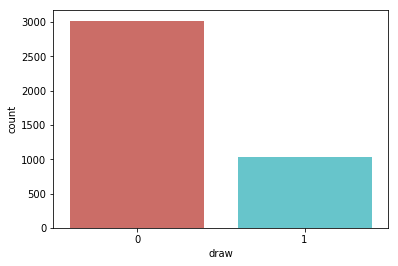

In [18]:
sns.countplot(x='draw', data=df_final , palette = "hls")
plt.show()

In [19]:
count_no_draws = len(df_final[df_final['draw']==0])
count_draws = len(df_final[df_final['draw']==1])
pct_of_no_draws = count_no_draws/(count_draws+count_no_draws)
print("Percentage of no draws is", pct_of_no_draws*100)
pct_of_draws = count_draws/(count_draws+count_no_draws)
print("Percentage of draws", pct_of_draws*100)

Percentage of no draws is 74.59259259259258
Percentage of draws 25.407407407407405


Zbiór daych składa się z 4040 obserwacji. 
Ponad 22% z nich to zdarzenia w których zmienna wynikowa, w naszym przypadku 'draw', przyjmuje wartośc 1, co oznacza wystapienie remisu.

### Tabela kontyngencji

In [20]:
contingency_table = pd.crosstab(df_final['HM1_D'], df_final['draw'])
contingency_table.sum(axis=1)
contingency_table.sum(axis=0)
contingency_table.astype('float').div(contingency_table.sum(axis=1),axis=0)

draw,0,1
HM1_D,,
0,0.752968,0.247032
1,0.724951,0.275049


In [21]:
warnings.simplefilter('ignore')
df_final.groupby('draw').mean() 

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,HM3_D,HM3_L,HM3_W,HM4_D,HM4_L,HM4_W,HM5_D,HM5_L,HM5_M,HM5_W,AM3_D,AM3_L,AM3_W,AM4_D,AM4_L,AM4_W,AM5_D,AM5_L,AM5_M,AM5_W,MW,HT_LP,AT_LP,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,H2H_Home_pts,H2H_Away_pts,Mean_home_goals,Mean_away_goals,Total_value_H,Total_value_A,H2H_Diff,Total_Diff,Age_diff,LP_Diff
draw,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,28.239656,28.214830,0.244290,0.429659,0.326051,0.264482,0.323734,0.411784,0.254551,0.322079,0.423370,0.256538,0.408143,0.335319,0.237670,0.410129,0.352201,0.258524,0.348891,0.392585,0.245614,0.358491,0.028798,0.367097,0.263489,0.335319,0.401192,0.248262,0.380669,0.371069,0.254220,0.358822,0.028798,0.358160,21.489904,10.000000,9.821913,0.232704,0.130751,0.024826,-0.126117,-0.147302,3.221119,3.455478,1.471648,1.149252,154.564962,148.950645,-0.234359,1.746868,0.008606,0.178087
1,26.733722,27.411079,0.272109,0.421769,0.306122,0.275024,0.354713,0.370262,0.290573,0.294461,0.414966,0.237123,0.428571,0.334305,0.261419,0.392614,0.345967,0.288630,0.376093,0.335277,0.251701,0.386783,0.032070,0.329446,0.286686,0.326531,0.386783,0.262391,0.394558,0.343052,0.262391,0.351798,0.032070,0.353741,21.089407,10.356657,10.107872,-1.091351,-0.016521,-0.677357,-0.439261,0.412051,3.011662,3.650146,1.408173,1.139362,135.739825,151.085909,-0.638484,1.441337,-0.026531,0.248785


Zgrupowany zbiór danych według zminnej 'draw' w poszukiwaniu ciekawych wniosków.
Większość zmiennych nie rózni się średnimi w danej kategorii.
Poza nimi interesująca jest m.in. Zmienna HTGD (róznica bramek strzelonych i straconych drużyny gospodarzy w sezonie), która przyjmuje mniejszą wartość średniej dla grupy z draw = 1, aniżeli dla grupy z draw = 0.

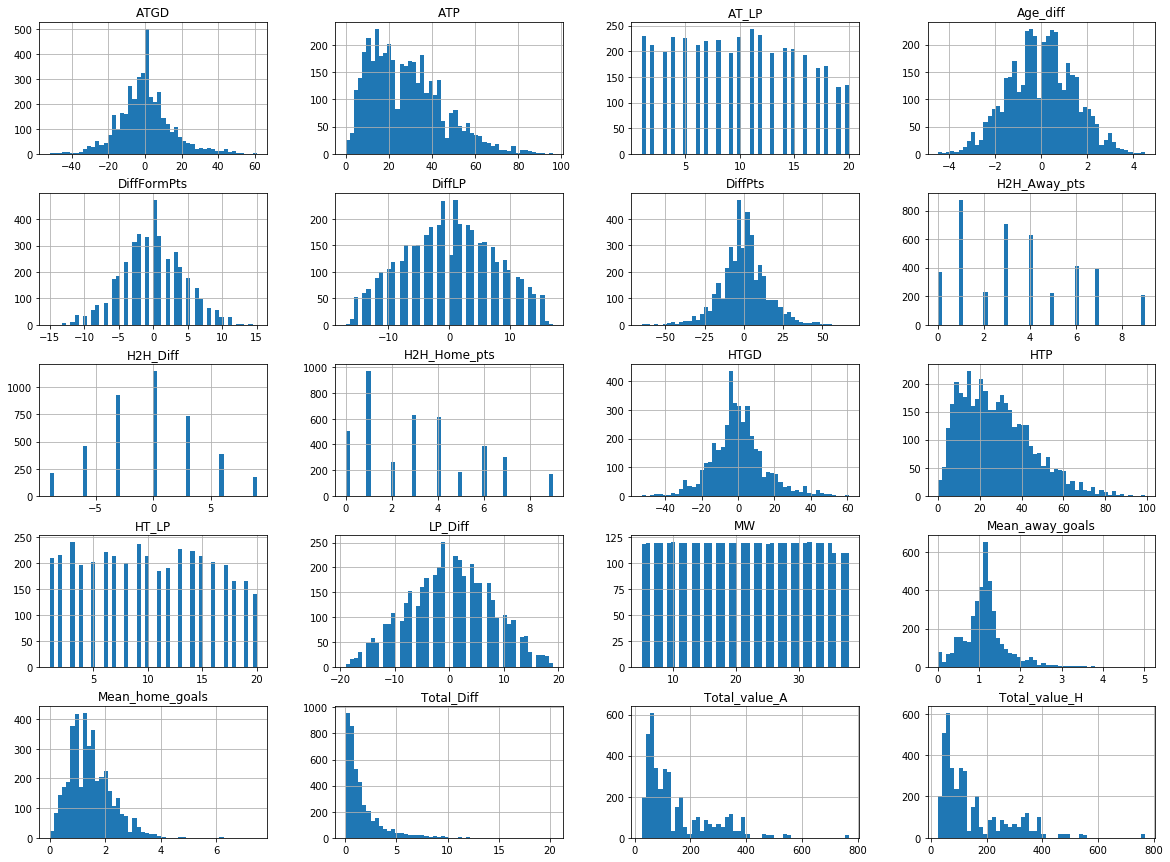

In [22]:
cols_to_plot = [ 'HTP', 'ATP',    'MW',  'HT_LP', 'AT_LP',    'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP',
          'H2H_Home_pts', 'H2H_Away_pts', 'Mean_home_goals', 'Mean_away_goals',
        'Total_value_H',   'Total_value_A',      'H2H_Diff', 
      'Total_Diff', 'Age_diff', 'LP_Diff', 'draw']
df_final[cols_to_plot].hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026749B3ED30>,
      dtype=object)

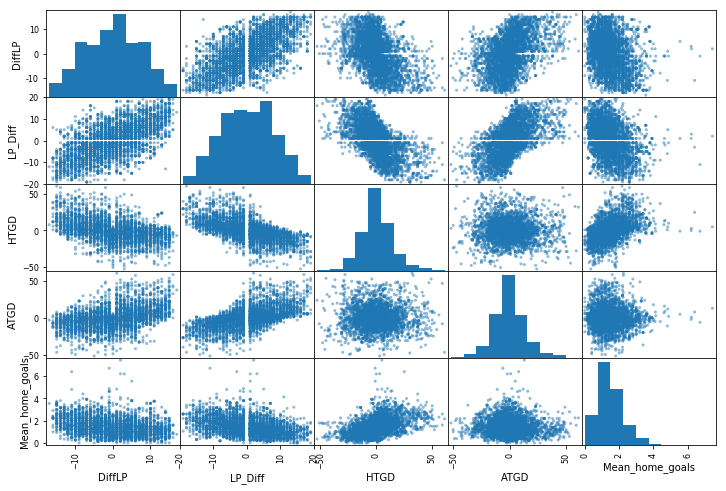

In [23]:
from pandas.tools.plotting import scatter_matrix
attributes = ["DiffLP", "LP_Diff", "HTGD", "ATGD", 
                     "Mean_home_goals"]
scatter_matrix(df_final[attributes], figsize=(12, 8))

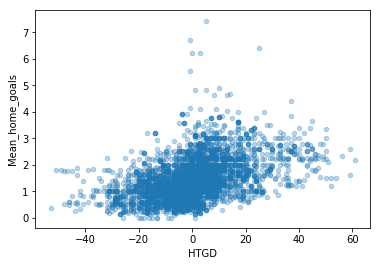

In [24]:
df_final.plot(kind="scatter", x="HTGD", y="Mean_home_goals",      alpha=0.3)

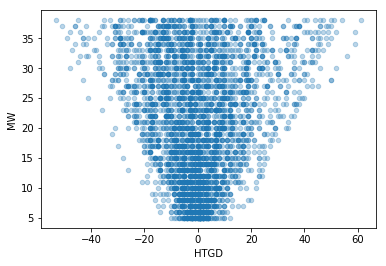

In [25]:
df_final.plot(kind="scatter", x="HTGD", y="MW",      alpha=0.3)

Zmienne, których odchylenie standardowe rośnie wraz ze biegiem sezon, należy podzielić przez dany numer kolejki.

### Modyfikacja zmiennych które rosną wraz z kolejkami

In [26]:
df_final["HTGD_by_MW"] = df_final["HTGD"] / df_final["MW"] 
df_final["ATGD_by_MW"] = df_final["ATGD"] / df_final["MW"] 
df_final["HTP_by_MW"] = df_final["HTP"] / df_final["MW"] 
df_final["ATP_by_MW"] = df_final["ATP"] / df_final["MW"] 

df_final["Goals_mean_diff"] = df_final["Mean_home_goals"] - df_final["Mean_away_goals"]

# Korelacja zmiennych

In [27]:
cols_selected = ['HT_LP', 'AT_LP', 
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts', 'DiffFormPts', 'DiffLP',  'Mean_home_goals',
       'Mean_away_goals', 'Total_value_H', 'Total_value_A', 'H2H_Diff',
        'Total_Diff', 'Age_diff', 'LP_Diff', 'draw', 
          'HTGD_by_MW', 'ATGD_by_MW', "H2H_Home_pts", "H2H_Away_pts", 
       'Goals_mean_diff']

corr_matrix = df_final[cols_selected].corr()
corr_matrix[(corr_matrix>0.8) | (corr_matrix< -0.8) ]

,HT_LP,AT_LP,DiffPts,DiffFormPts,DiffLP,Mean_home_goals,Mean_away_goals,Total_value_H,Total_value_A,H2H_Diff,Total_Diff,Age_diff,LP_Diff,HTGD_by_MW,ATGD_by_MW,H2H_Home_pts,H2H_Away_pts,Goals_mean_diff
HT_LP,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.889968,NaN,NaN,NaN,NaN
AT_LP,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.889143,NaN,NaN,NaN
DiffPts,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.8791,NaN,NaN,NaN,NaN,NaN
DiffFormPts,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiffLP,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean_home_goals,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83074
Mean_away_goals,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_value_H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_value_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2H_Diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.874038,-0.876916,NaN


Usuniecie wysoce skorelowanych zmiennych ze soba

In [28]:
cols_selected = ['HT_LP', 'AT_LP', 
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts', 'DiffFormPts', 'DiffLP',
       'Mean_away_goals',  'H2H_Diff',
         'Total_Diff', 'Age_diff', 'LP_Diff', 'draw', 'HTGD_by_MW', 'ATGD_by_MW',
       'Goals_mean_diff']
corr_matrix = df_final[cols_selected].corr()
corr_matrix[(corr_matrix>0.85) | (corr_matrix< -0.85) ]

,HT_LP,AT_LP,DiffPts,DiffFormPts,DiffLP,Mean_away_goals,H2H_Diff,Total_Diff,Age_diff,LP_Diff,HTGD_by_MW,ATGD_by_MW,Goals_mean_diff
HT_LP,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.889968,NaN,NaN
AT_LP,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.889143,NaN
DiffPts,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,-0.8791,NaN,NaN,NaN
DiffFormPts,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DiffLP,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean_away_goals,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2H_Diff,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Total_Diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Age_diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
LP_Diff,NaN,NaN,-0.8791,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN


### Finalny zbiór danych

In [29]:
cols_final = ['HT_LP', 'AT_LP', 
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts', 'DiffFormPts', 'DiffLP',
       'Mean_away_goals',  'H2H_Diff',
         'Total_Diff', 'Age_diff', 'LP_Diff', 'draw', 'HTGD_by_MW', 'ATGD_by_MW',
       'Goals_mean_diff', 'HM1_D', 'HM1_L', 'HM1_W',
       'HM2_D', 'HM2_L', 'HM2_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L',
       'AM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM3_D', 'AM3_L', 'AM3_W']
data_final = df_final[cols_final]
data_final.tail()

,HT_LP,AT_LP,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,Mean_away_goals,H2H_Diff,Total_Diff,Age_diff,LP_Diff,draw,HTGD_by_MW,ATGD_by_MW,Goals_mean_diff,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,HM3_D,HM3_L,HM3_W,AM3_D,AM3_L,AM3_W
4045,1,10,0,0,0,0,0,0,0,0,44,6,-7,2.367347,9,3.464833,4.1,-9,0,1.303030,0.030303,0.132653,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0
4046,7,10,0,0,0,0,0,0,0,0,9,3,-5,1.580511,0,1.662759,2.6,-3,1,0.300000,0.100000,0.551068,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0
4047,14,10,0,0,0,0,0,0,0,0,-10,-2,9,2.054737,-3,0.257214,2.8,4,0,-0.666667,0.250000,-1.379737,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4048,18,11,0,0,0,0,0,0,0,0,-11,2,8,1.170000,-3,0.170875,2.4,7,0,-0.714286,0.000000,1.080000,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
4049,8,12,0,0,0,0,0,0,0,0,2,2,3,1.247525,0,0.542967,1.1,-4,1,0.066667,0.000000,0.152475,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0


# Over-sampling z wykorzystaniem SMOTE

Przed przystąpieniem do implementacji modelu należy zrobić coś z nieproporcjonalnym zbiorem danych. Jak przedstawione zostałe wyżej, zmienna objaśniana przyjmuje wartośc '1' wyłącznie w około 22% przypadkach. W takim przypadku algorytm widzi dominację kategorii 0 nad 1, co może zakłucać działanie algorytmu. Innymi słowy algorytm może przyporzadkować wszystkie obserwacje jako kategorię 0, co będzie skutkowało skutecznościa predykcji na poziomie 77%, co jest stosunkowo dobrym wynikiem. 
Aby bardziej zobrazować problem, wyobraźmy sobie algorytm do wyszukiwania oszustw bankowych. W zbiorze danych takie zdarzenie miało miejsce w 5 przypadkach na 10000. Jeżeli algorytm przyporządkuje wszystkie przypadki jako te bez-oszustwa to skuteczność modelu będzie wynosić: 99.95%. Na pozór bardzo dobry model predykcyjny, a przecież algorytm nie znalazł ani jednego zdarzenia z oszustwem bankowym. OK, wracamy do naszego zadania znalezienia meczów kończących się remisem.

Jednym z rozwiązań jakie adresowane jest do tego rodzajów problemu jest Over-sampling of minority class, czyli próbkowanie klasy z mniejszościową kategorią.  
Nie zagłębiając się w szczegóły, które możecie znaleźć w (http://rikunert.com/SMOTE_explained), funkcja SMOTE działa następująco:
1. Tworzy sztuczne obserwacje na podstawie mniejszościowej kategorii w zbiorze danych (draw = 1) zamiast dodawać ich kopi.
2. Losowo wybiera jeden z k-najbliższych-sąsiadów i wykorzystuje go do stworzenia podbnej lecz delikatnie zmodyfikowanej nowej obserwacji.

In [30]:
X = data_final.loc[:, data_final.columns != 'draw']
y = data_final.loc[:, data_final.columns == 'draw']

In [31]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [32]:
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['draw'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no draw in oversampled data",len(os_data_y[os_data_y['draw']==0]))
print("Number of draws",len(os_data_y[os_data_y['draw']==1]))
print("Proportion of no draws data in oversampled data is ",len(os_data_y[os_data_y['draw']==0])/len(os_data_X))
print("Proportion of draws data in oversampled data is ",len(os_data_y[os_data_y['draw']==1])/len(os_data_X))

length of oversampled data is  4206
Number of no draw in oversampled data 2103
Number of draws 2103
Proportion of no draws data in oversampled data is  0.5
Proportion of draws data in oversampled data is  0.5


Stosunek kategorii w zmienej wynikowej 'draw' jest teraz idealny i równy 1/1.
Proszę zwrócić również uwagę, że zbiór danych został zwiększony a kontretnie uzupełniony o stworzone nowe obserwacje.

In [33]:
os_data_X.tail()

,HT_LP,AT_LP,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffPts,DiffFormPts,DiffLP,Mean_away_goals,H2H_Diff,Total_Diff,Age_diff,LP_Diff,HTGD_by_MW,ATGD_by_MW,Goals_mean_diff,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,HM3_D,HM3_L,HM3_W,AM3_D,AM3_L,AM3_W
4201,13.000000,10.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,-2.000000,-2.000000,-9.000000,0.635714,0.000000,2.192242,0.800000,3.000000,-0.352941,-0.411765,0.410037,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.00000,0.000000,1.0,0.000000,0.000000,0.000000,1.0
4202,10.639615,6.639615,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,-7.000000,3.040578,3.639615,1.222286,-3.959422,0.369987,-0.252270,4.000000,0.067176,0.188701,0.047688,1.000000,0.0,0.000000,0.000000,0.319807,0.680193,1.000000,0.000000,0.00000,0.680193,0.319807,0.00000,0.319807,0.0,0.680193,0.680193,0.319807,0.0
4203,13.000000,16.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,3.000000,1.000000,6.000000,1.170000,-3.000000,0.533694,1.500000,-3.000000,-0.071429,-0.392857,-0.420000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.00000,0.000000,1.0,0.000000,0.000000,1.000000,0.0
4204,20.000000,14.000000,0.0,0.0,0.460463,0.0,0.00000,0.0,0.0,0.0,-17.920927,-1.079073,-1.920927,1.403280,1.618610,0.870892,-0.060463,6.000000,-1.087079,-0.334658,-0.842450,0.539537,0.0,0.460463,0.539537,0.460463,0.000000,0.460463,0.539537,0.00000,0.460463,0.539537,0.00000,0.000000,1.0,0.000000,1.000000,0.000000,0.0
4205,19.816599,4.000000,0.0,0.0,0.000000,0.0,0.95415,0.0,0.0,0.0,-36.045850,-7.816599,3.412653,1.071362,2.724898,0.327320,-1.463320,15.816599,-1.094175,0.568774,-0.431363,0.000000,1.0,0.000000,0.000000,0.954150,0.045850,0.045850,0.000000,0.95415,0.000000,0.954150,0.04585,0.000000,0.0,1.000000,0.000000,0.000000,1.0


In [34]:
cols = ['HT_LP', 'AT_LP', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'DiffPts',
       'DiffFormPts', 'DiffLP',  'H2H_Diff',
       'HM1_D', 'HM1_L', 'HM1_W',
       'HM2_D', 'HM2_L', 'HM2_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L',
       'AM2_W', 'HM3_D', 'HM3_L', 'HM3_W',  'AM3_D', 'AM3_L', 'AM3_W']
#os_data_X[cols] = os_data_X[cols].round(0)

# Wybór zmiennych

Wybór zmiennych dokonany zostanie za pomoca rekursywnej eliminacji zmiennych (Recursive Feature Elimination RFE)
Działanie tego mechanizmu oparte jest na wielokrotnym tworzeniu modelu i wybieraniu z niego najlepszej lub nagorszej zmiennej pod względem jakości stworzonego modelu. Nastepnie zmienną tę eliminuje się (lub dodaje w zalezności od wybranej techniki - w naszym przypadku jest to eliminacja) i powtarza się konstrukcję modelu oraz oszacowuje się jakość nowego modelu.Czynnośc tę wykonuje się aż do momentu, kiedy przeanalizowane zostaną wszystkie zmienne w zbiorze danych.
Głównym celem działania RFE jest wybór zmienych poprzez wybór modelu z jak najmniejszą ilością zmiennych.

In [35]:
data_final_vars=data_final.columns.values.tolist()
y=['draw']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'lbfgs')

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)

mask = pd.Series(rfe.support_)
mask.index = os_data_X.columns
mask

HT_LP              False
AT_LP              False
HTWinStreak3        True
HTWinStreak5        True
HTLossStreak3       True
HTLossStreak5       True
ATWinStreak3        True
ATWinStreak5        True
ATLossStreak3       True
ATLossStreak5       True
DiffPts            False
DiffFormPts        False
DiffLP             False
Mean_away_goals     True
H2H_Diff           False
Total_Diff          True
Age_diff           False
LP_Diff            False
HTGD_by_MW          True
ATGD_by_MW          True
Goals_mean_diff     True
HM1_D              False
HM1_L              False
HM1_W              False
HM2_D              False
HM2_L               True
HM2_W              False
AM1_D               True
AM1_L              False
AM1_W               True
AM2_D               True
AM2_L              False
AM2_W              False
HM3_D              False
HM3_L               True
HM3_W               True
AM3_D              False
AM3_L              False
AM3_W               True
dtype: bool

In [36]:
X=os_data_X.loc[:, mask]
y=os_data_y['draw']

# Implementacja modelu regresji logistycznej

In [37]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.676274
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.024     
Dependent Variable: draw             AIC:              5728.8199 
Date:               2019-05-07 14:24 BIC:              5855.7052 
No. Observations:   4206             Log-Likelihood:   -2844.4   
Df Model:           19               LL-Null:          -2915.4   
Df Residuals:       4186             LLR p-value:      7.7847e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
HTWinStreak3      -1.1698   0.2044 -5.7240 0.0000 -1.5703 -0.7692
HTWinStreak5      -0.8898   0.4943 -1.8000 0.0719 -1.8587  0.0791


Na podstawie p-value (kolumna P>|z|) najeży wybrać zmienne które są istotne statystycznie.
W naszym przypadku poziom ufnoścu przyjeliśmy równy 5% czyli wsystkie zmienne z p-value powyżej 0.05 należy odrzucić z modelu.

In [38]:
cols_to_df = ["HTWinStreak3",  "ATWinStreak3","ATLossStreak3", "Mean_away_goals", "Total_Diff", "HTGD_by_MW", "ATGD_by_MW", "AM2_D", "HM3_L",
             "AM3_D", "AM3_W"]

X=os_data_X[cols_to_df]
y=os_data_y['draw']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.680592
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.018     
Dependent Variable: draw             AIC:              5747.1365 
Date:               2019-05-07 14:24 BIC:              5816.9235 
No. Observations:   4206             Log-Likelihood:   -2862.6   
Df Model:           10               LL-Null:          -2915.4   
Df Residuals:       4195             LLR p-value:      4.0697e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
HTWinStreak3      -1.1842   0.1858 -6.3724 0.0000 -1.5485 -0.8200
ATWinStreak3      -0.4494   0.1482 -3.0322 0.0024 -0.7398 -0.1589


## Cross walidacja

In [39]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model.LogisticRegression(), X, y,
scoring='accuracy', cv=8)
print(scores)
print(scores.mean())

[0.52091255 0.54942966 0.51140684 0.56844106 0.55323194 0.57034221
 0.60646388 0.59351145]
0.5592174484079762


## Weryfikacja modelu 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.54
[[287 350]
 [227 398]]


              precision    recall  f1-score   support

           0       0.56      0.45      0.50       637
           1       0.53      0.64      0.58       625

   micro avg       0.54      0.54      0.54      1262
   macro avg       0.55      0.54      0.54      1262
weighted avg       0.55      0.54      0.54      1262



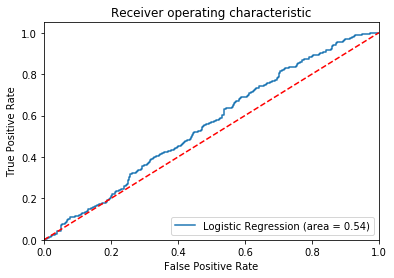

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Compute precision, recall, F-measure and support
To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

# Nowe dane

In [43]:
loc = dics + ":/data_football/seriaa/"
file = "predict"
predict = pd.read_csv(loc + 'predict.csv', index_col = 0)
loc_to_functions = dics + ":/data_football/"
league = "seriaa"

import os, re
os.chdir(loc_to_functions)

import functions_laliga as f1


df = f1.dataset_prepering(loc, file, league)

df = df[cols_to_df ]
y_pred_new = logreg.predict(df)

df = f1.dataset_prepering(loc, file, league)


final = pd.concat([df[["HomeTeam", "AwayTeam"]].reset_index(drop=True), pd.DataFrame(y_pred_new)], axis=1)
final

,HomeTeam,AwayTeam,0
0,Juventus,Torino,0
1,Udinese,Inter,0
2,Empoli,Fiorentina,1
3,Lazio,Atalanta,1
4,Parma,Sampdoria,1
5,Sassuolo,Frosinone,1
6,Chievo,Spal,0
7,Genoa,Roma,0
8,Napoli,Cagliari,0
9,Milan,Bologna,0
